In [2]:
1+2

3

In [3]:
print("hello world!")

hello world!


In [4]:
# Hello There!


In [5]:
import numpy


In [6]:
a = numpy.zeros([3,2])
a[0,0] = 1
a[0,1] = 2
a[1,0] = 9
a[2,1] = 12
print(a)

[[ 1.  2.]
 [ 9.  0.]
 [ 0. 12.]]


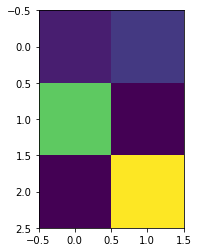

In [7]:
import matplotlib.pyplot
%matplotlib inline

matplotlib.pyplot.imshow(a, interpolation="nearest")

In [8]:
class Dog:
    
    def bark(self):
        print('woof!')
        pass
    pass
sizzles = Dog()
sizzles.bark()


woof!


In [20]:
import scipy.special

class NeuralNetwork:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.lr = learningrate
        self.wih = numpy.random.normal(0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        self.activation_function = lambda x: scipy.special.expit(x)
        #self.wih = numpy.random.rand(self.hnodes, self.inodes) - 0.5
        #self.who = numpy.random.rand(self.hnodes, self.onodes) - 0.5
        pass
    def train(self, inputs_list, targets_list):
        targets = numpy.array(targets_list, ndmin=2).T
        inputs = numpy.array(inputs_list, ndmin=2).T
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)

        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors)
        #print(self.who)
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1-final_outputs)), numpy.transpose( hidden_outputs))
        #print(self.who)
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1-hidden_outputs)), numpy.transpose( inputs))
        #print(numpy.sum(output_errors))
        pass

    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs
    pass




In [10]:
data_file = open("mnist_train.csv", "r")
data_list = data_file.readlines()
data_file.close()

[0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01]


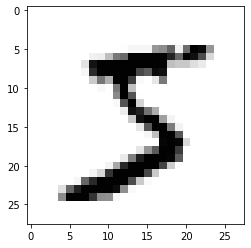

In [11]:
import numpy
import matplotlib.pyplot
%matplotlib inline
all_values = data_list[0].split(',')

image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
#print(image_array)
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')




In [21]:
inodes = 784
hnodes = 100
onodes = 10
lr = 0.3




n = NeuralNetwork(inodes, hnodes, onodes, lr)

for record in data_list:
    all_values = record.split(',')

    scaled_input = (numpy.asfarray(all_values[1:]) / 255) * .99 + .01

    scaled_target = numpy.zeros(onodes) + .01
    scaled_target[int(all_values[0])] = .99
    n.train(scaled_input, scaled_target)
    pass

print('done!')
#print(scaled_target)
#print(scaled_input)



done!


In [35]:
test_data_file = open('mnist_test.csv', 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

score = []
for item in test_data_list:
    firstValues = item.split(',')

    answer = int(firstValues[0])
    #print(firstValues[0])

    #img = numpy.asfarray(firstValues[1:]).reshape((28,28))
    #matplotlib.pyplot.imshow(img)

    input = numpy.asfarray(firstValues[1:]) / 255 * .99 + 0.1
    output = n.query(input)
    result = numpy.argmax(output)
    if result == answer:
        score.append(1)
    else:
        pass
        #print("expected " + answer + " but was " + result)
    pass

print(len(score) / len(test_data_list))

len(test_data_list)
#len(test_data_list)


0.8713


10000

In [13]:
# Hello world!

